### ✔️ You guessed right!

Based on the results from the Feature Extraction notebook; it is most reasonable to start with SVMs, since they have already achieved almost 100% accuracy without any hyperparameter tuning

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

from utils import *

We shall start by loading the features extracted by the BoVW module

In [2]:
X_train, y_train = load_features_from_file("../2. Feature Selection & Extraction/Saved Features/BoVW_features_training_2.csv")
X_val, y_val = load_features_from_file("../2. Feature Selection & Extraction/Saved Features/BoVW_features_validation_2.csv")

Now for training the SVM model. Our first idea was to try out a polynomial kernel with degree 2. Let's train it:

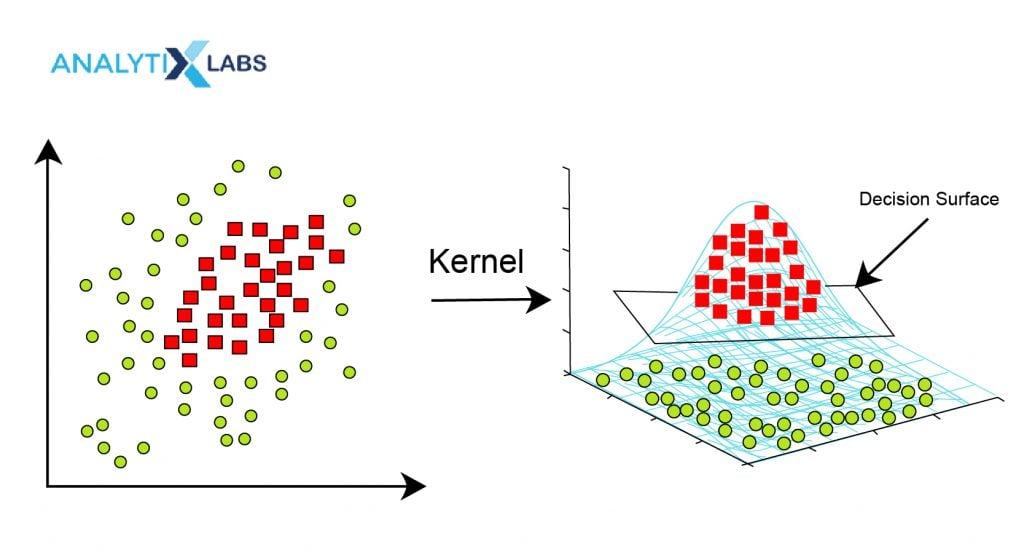

### 😎  Put on your Machine Learning Goggles:

In [3]:
# Initialize the SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', degree=2, C=1, gamma='scale', probability=True)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print a classification report
print(f'Validation Accuracy: {accuracy:.2f}')
print(f"Classification Report on SVMs:\n", classification_report(y_val, y_pred))

Validation Accuracy: 1.00
Classification Report on SVMs:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       225
         1.0       1.00      1.00      1.00       193
         2.0       1.00      0.99      1.00       179
         3.0       1.00      1.00      1.00       203

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



<img src="https://media1.tenor.com/m/QxqYH15_UxYAAAAd/wow-omg.gif" width="250">

We have indeed improved the SVM model! It now achieves an f1-score of 1 in every single class, and its accuracy is approximately 100%.
There is of course a very slight issue; the recall of class 2 is 0.99. There seems to be a very small number of incorrectly classified examples out of the given 800. Let's see how many

In [4]:
np.sum(y_pred != y_val)

1

Only 1 incorrectly classified example; this is excellent!
We are already satisifed with this result. As such, let's store it.

In [5]:
# Save the trained SVM classifier
joblib.dump(svm_model, "final_model.pkl")

['final_model.pkl']

Now that our final model is ready, as well as the KMeans used for feature extraction, we can proceed to the final phase: the Performance Analysis Module

<div align="center">
    <img src="https://i.imgur.com/LMiA2O5.gif" width=800/>
</div>